## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [108]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
wine = datasets.load_wine()
dwine = wine.data
data = pd.DataFrame(dwine)
scaler = MinMaxScaler()
scaler.fit(data)
data_s = scaler.transform(data)
x_train, x_test, y_train, y_test = train_test_split(data_s, wine.target, test_size=0.2, random_state=4)
data = pd.DataFrame(x_train)

               0           1           2           3           4           5   \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     0.518643    0.308398    0.539241    0.463373    0.328230    0.466586   
std      0.212817    0.221420    0.152980    0.173754    0.155395    0.211802   
min      0.000000    0.029644    0.000000    0.000000    0.000000    0.000000   
25%      0.352632    0.170455    0.449198    0.340206    0.198370    0.285345   
50%      0.531579    0.211462    0.534759    0.458763    0.304348    0.491379   
75%      0.692763    0.443182    0.649733    0.561856    0.413043    0.627586   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000   
mean     0.370327    0.426521    0.377682    0.317923    0.392912    0.495847   
std      0.207233    0.2284

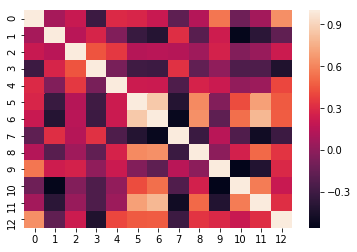

In [109]:
import seaborn as sns
print(data.describe())
cof = data.corr()
sns.heatmap(cof)

In [112]:
reg = linear_model.LogisticRegression(penalty='none', solver='saga')
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Coefficient = {}'.format(reg.coef_))

Coefficient = [[  7.89251942   2.36147353   7.92364446 -10.86627768   0.87920192
    0.41692873   5.40138874  -2.20817348  -2.26906223  -1.61816864
   -2.180614     6.08403884  12.14887228]
 [ -9.08927249  -4.65293978  -9.13881178   5.32095898  -0.79952599
    0.24611098   2.57566676   3.35876323   2.25687549 -13.21494964
    7.70596427  -0.12047925 -13.34206611]
 [  3.62056291   3.23798736   3.65205557   3.75068692   2.7430222
   -2.41217588  -9.3475988   -1.12941008  -4.97740587   8.23712498
   -7.98752593  -7.80290292   0.69015057]]


C:\Users\benja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\benja\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\benja\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\benja\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [117]:
from sklearn.metrics import accuracy_score

In [122]:
matrix = confusion_matrix(y_test, y_pred)
print('confusion matrix = {}'.format(matrix))
ac = accuracy_score(y_test, y_pred)
print('accuracy ={}'.format(ac))

confusion matrix = [[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy =1.0


In [125]:
lasso = linear_model.LogisticRegression(penalty='l1', l1_ratio=0.1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print('Coefficient = {}'.format(lasso.coef_))

Coefficient = [[ 1.81017778  0.          0.         -3.00535318  0.          0.
   1.24126375 -0.26337793  0.          0.          0.          2.46661894
   7.83489235]
 [-3.97122002 -0.55418931  0.          0.          0.          0.
   0.          0.          0.         -4.82209226  3.89847153  0.25266084
  -5.97610246]
 [ 0.          1.72751457  0.          0.          0.          0.
  -4.31663656  0.          0.          4.53781927 -1.03250981 -4.6382356
   0.        ]]


C:\Users\benja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\benja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\benja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [126]:
matrix = confusion_matrix(y_test, y_pred)
print('confusion matrix = {}'.format(matrix))
ac = accuracy_score(y_test, y_pred)
print('accuracy ={}'.format(ac))

confusion matrix = [[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy =1.0


In [127]:
l2 = linear_model.LogisticRegression(penalty='l2', solver='saga')
l2.fit(x_train, y_train)
y_pred = l2.predict(x_test)
print(l2.coef_)

[[ 2.31744841  0.09557215  0.96187783 -1.62727117  0.60717129  1.05531835
   1.53096861 -0.9228475   0.29424354  0.41932291  0.50453391  1.77803766
   3.08475259]
 [-2.94453899 -1.26173783 -1.35370643  0.81320251 -0.74257843 -0.05595168
   0.28349844  0.39778899  0.31829289 -2.66797103  1.33661591  0.58391643
  -2.77070718]
 [ 0.71533174  1.25488381  0.48739108  0.79635631  0.28232525 -1.21533515
  -1.95613308  0.54405777 -0.82293511  2.0219108  -1.93017357 -2.5239088
  -0.28833771]]


C:\Users\benja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [128]:
matrix = confusion_matrix(y_test, y_pred)
print('confusion matrix = {}'.format(matrix))
ac = accuracy_score(y_test, y_pred)
print('accuracy ={}'.format(ac))

confusion matrix = [[10  0  0]
 [ 0 13  0]
 [ 0  0 13]]
accuracy =1.0


#Boston Data

In [93]:
from scipy.stats import boxcox
from sklearn.metrics import mean_absolute_error

In [87]:
boston = datasets.load_boston()
dbos = boston.data
data = pd.DataFrame(dbos)
data[1][data[1]<=0] = 0.001
data[1] = boxcox(data[1], lmbda=0.15)
scaler = MinMaxScaler()
scaler.fit(data)
data_s = scaler.transform(data)
x_train, x_test, y_train, y_test = train_test_split(data_s, boston.target, test_size=0.2, random_state=4)

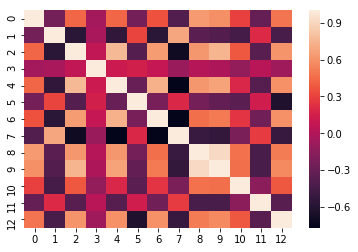

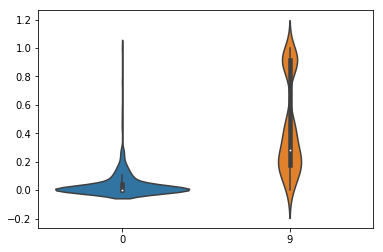

In [88]:
data = pd.DataFrame(x_train)
cor = data.corr()
ax = plt.subplots()
ax = sns.heatmap(cor)
ax2 = plt.subplots()
ax2 = sns.violinplot(data=data.loc[:,[0,9]])

In [97]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print('Coefficient = {}'.format(reg.coef_))
y_pred = reg.predict(x_test)
print('MAE ={}'.format(mean_absolute_error(y_pred, y_test)))

Coefficient = [ -9.73944502   1.89984478  -0.12597573   3.32469566  -8.15687726
  20.67817861  -1.26431976 -15.79392358   6.01666908  -5.73077273
  -8.77984886   3.42288401 -16.55612469]
MAE =3.3822873693684734


In [103]:
L1 = linear_model.Lasso(alpha=0.1)
L1.fit(x_train, y_train)
print('Coefficient = {}'.format(L1.coef_))
y_pred = L1.predict(x_test)
print('MAE = {}'.format(mean_absolute_error(y_pred, y_test)))

Coefficient = [ -0.           0.          -0.           2.2157524   -0.08279623
  19.16210126  -0.          -1.45834041   0.          -1.89193522
  -7.03185552   1.72986266 -17.52145707]
MAE = 3.5125613813164454


In [106]:
ridge = linear_model.Ridge()
ridge.fit(x_train, y_train)
print('Coefficient = {}'.format(ridge.coef_))
y_pred = ridge.predict(x_test)
print('MAE = {}'.format(mean_absolute_error(y_pred, y_test)))

Coefficient = [ -6.52697354   1.52770891  -0.93690173   3.52749098  -6.36330379
  18.71336651  -0.92286511 -12.58207917   4.61543005  -4.82545523
  -8.5313525    3.33711308 -16.35609631]
MAE = 3.3762937471717644
